In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
glass = pd.read_csv('/content/sample_data/glass.csv')

In [ ]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
glass.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
glass.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
sum(glass.duplicated())

1

In [ ]:
dupe = glass[glass.duplicated(subset=None,keep='first')]
dupe

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [ ]:
glass.drop_duplicates(inplace=True)
glass.shape

(213, 10)

In [ ]:
corr_glass = glass.corr(method='pearson')
corr_glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


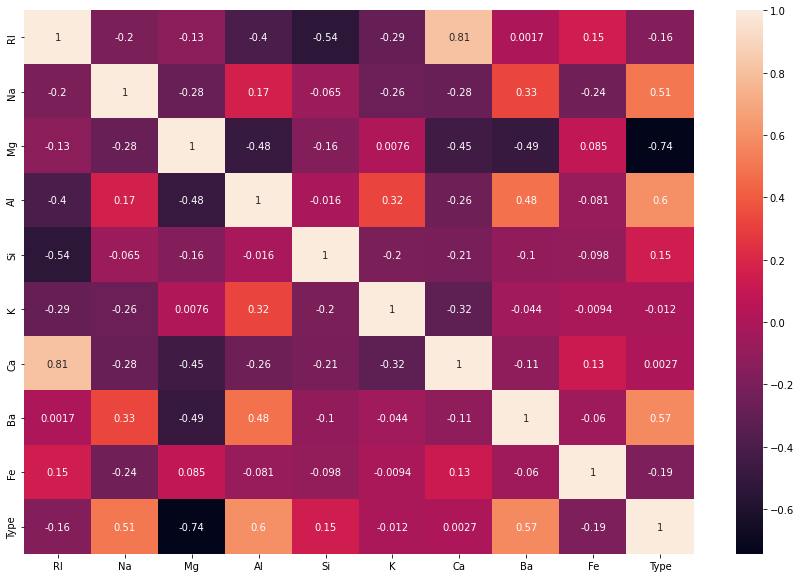

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_glass,annot=True,cbar=True)

In [ ]:
glass.describe().iloc[[3,7],:]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
min,1.51115,10.73,0.00,0.29,69.81,0.00,5.43,0.00,0.00,1.0
max,1.53393,17.38,4.49,3.50,75.41,6.21,16.19,3.15,0.51,7.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import warnings
mms = MinMaxScaler()
le = LabelEncoder()


In [ ]:
glass.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [ ]:
glass['Type'] = le.fit_transform(glass[['Type']])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
glass['RI'] = mms.fit_transform(glass[['RI']])
glass['Na'] = mms.fit_transform(glass[['Na']])
glass['Mg'] = mms.fit_transform(glass[['Mg']])
glass['Al'] = mms.fit_transform(glass[['Al']])
glass['Si'] = mms.fit_transform(glass[['Si']])
glass['K'] = mms.fit_transform(glass[['K']])
glass['Ca'] = mms.fit_transform(glass[['Ca']])
glass['Ba'] = mms.fit_transform(glass[['Ba']])
glass['Fe'] = mms.fit_transform(glass[['Fe']])


In [ ]:
glass.describe().iloc[[3,7],:]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = glass.pop('Type')
x = glass

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

NAIVE BAYES CLASSIFIER

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
gauss = GaussianNB()
bern = BernoulliNB()
gauss.fit(x_train,y_train)


GaussianNB()

In [ ]:
y_pred = gauss.predict(x_test)

In [ ]:
bern.fit(x_train,y_train)

BernoulliNB()

In [ ]:
y_pred1 = bern.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 9,  1,  0,  0,  0,  0],
       [11,  2,  1,  1,  0,  0],
       [ 3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  2],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  1,  0,  8]])

In [ ]:
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[4, 6, 0, 0, 0, 0],
       [6, 9, 0, 0, 0, 0],
       [2, 1, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 7]])

In [ ]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

In [ ]:
val = {'Name':['Accuracy','R-Squared','MAE','MSE','RMSE',],
       'Guassian':[metrics.accuracy_score(y_test,y_pred),r2_score(y_test,y_pred),mean_absolute_error(y_test,y_pred),mean_squared_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred))],
       'Bernoulli':[metrics.accuracy_score(y_test,y_pred1),r2_score(y_test,y_pred1),mean_absolute_error(y_test,y_pred1),mean_squared_error(y_test,y_pred1),np.sqrt(mean_squared_error(y_test,y_pred1))]}

In [ ]:
df = pd.DataFrame(val)
df

,Name,Guassian,Bernoulli
0,Accuracy,0.534884,0.465116
1,R-Squared,0.728435,0.523105
2,MAE,0.627907,0.837209
3,MSE,0.953488,1.674419
4,RMSE,0.976467,1.293993


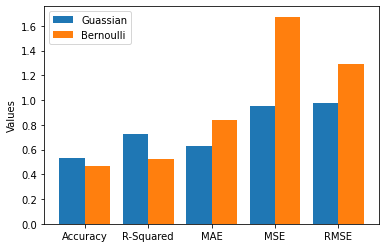

In [ ]:
x = np.arange(len(df['Name']))
width=0.4
plt.bar(x-width/2,df["Guassian"] , 0.4, label = 'Guassian')
plt.bar(x+width/2,df["Bernoulli"], 0.4, label = 'Bernoulli')
plt.ylabel('Values')
plt.xticks(x, df["Name"])
plt.legend()

Text(0.5, 33.0, 'Predicted Values')

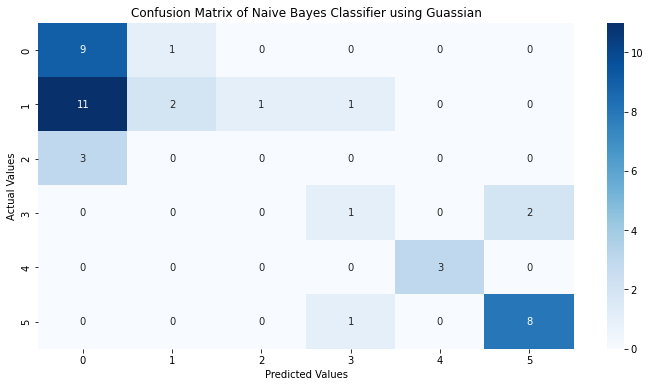

In [ ]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix of Naive Bayes Classifier using Guassian")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

Text(0.5, 33.0, 'Predicted Values')

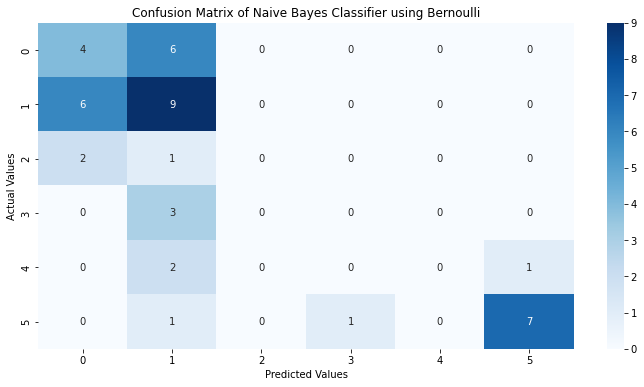

In [ ]:
cm1=confusion_matrix(y_test,y_pred1)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix of Naive Bayes Classifier using Bernoulli")
sns.heatmap(cm1, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

SUPPORT VECTOR MACHINE CLASSIFIER

In [ ]:
from sklearn import svm
rbf = svm.SVC(kernel='rbf', gamma=0.2, C=0.1)
poly = svm.SVC(kernel='poly', degree=5, C=1)

In [ ]:
rbf.fit(x_train,y_train)

SVC(C=0.1, gamma=0.2)

In [ ]:
poly.fit(x_train,y_train)

SVC(C=1, degree=5, kernel='poly')

In [ ]:
y_pred = rbf.predict(x_test)
y_pred1 = poly.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_pred1

array([1, 5, 0, 5, 0, 1, 0, 1, 1, 0, 1, 3, 0, 1, 4, 3, 5, 2, 0, 1, 0, 5,
       5, 5, 1, 3, 0, 0, 4, 0, 1, 1, 2, 1, 1, 5, 3, 0, 1, 1, 0, 3, 0])

In [ ]:
val = {'Name':['Accuracy','R-Squared','MAE','MSE','RMSE',],
       'RBF Kernel':[metrics.accuracy_score(y_test,y_pred),r2_score(y_test,y_pred),mean_absolute_error(y_test,y_pred),mean_squared_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred))],
       'Polynomial Kernel':[metrics.accuracy_score(y_test,y_pred1),r2_score(y_test,y_pred1),mean_absolute_error(y_test,y_pred1),mean_squared_error(y_test,y_pred1),np.sqrt(mean_squared_error(y_test,y_pred1))]}

In [ ]:
df1 = pd.DataFrame(val)
df1

,Name,RBF Kernel,Polynomial Kernel
0,Accuracy,0.348837,0.674419
1,R-Squared,-0.298213,0.675447
2,MAE,1.488372,0.534884
3,MSE,4.558140,1.139535
4,RMSE,2.134980,1.067490


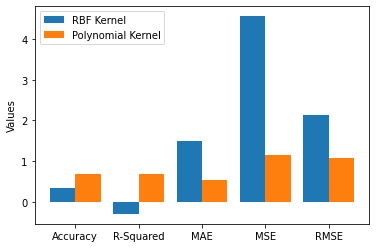

In [ ]:
x = np.arange(len(df1['Name']))
width=0.4
plt.bar(x-width/2,df1["RBF Kernel"] , 0.4, label = 'RBF Kernel')
plt.bar(x+width/2,df1["Polynomial Kernel"], 0.4, label = 'Polynomial Kernel')
plt.ylabel('Values')
plt.xticks(x, df1["Name"])
plt.legend()

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 6,  4,  0,  0,  0,  0],
       [ 0, 15,  0,  0,  0,  0],
       [ 1,  2,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  2],
       [ 0,  3,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  7]])

In [ ]:
cm1 = confusion_matrix(y_test,y_pred1)
cm1

array([[7, 2, 1, 0, 0, 0],
       [5, 9, 0, 1, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [0, 0, 0, 3, 0, 0],
       [0, 1, 0, 0, 2, 0],
       [0, 1, 0, 1, 0, 7]])

Text(0.5, 33.0, 'Predicted Values')

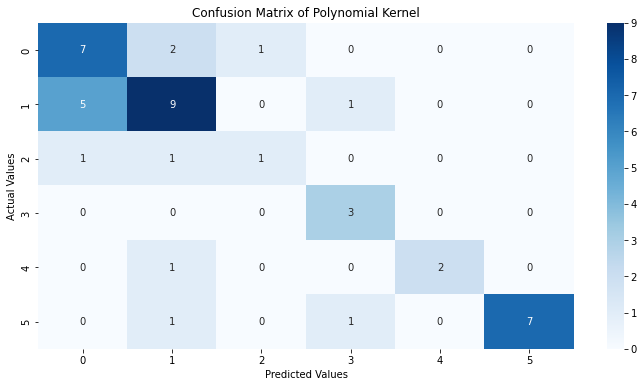

In [ ]:
cm1=confusion_matrix(y_test,y_pred1)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix of Polynomial Kernel")
sns.heatmap(cm1, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

Text(0.5, 33.0, 'Predicted Values')

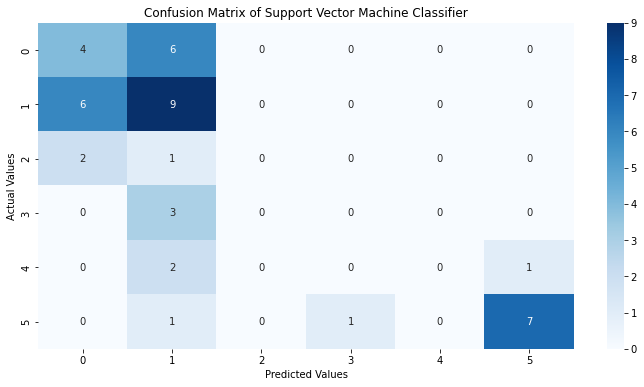

In [ ]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix of RBF Kernel")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [ ]:
rf = RandomForestClassifier(n_estimators=19)

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=19)

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Accuracy: 0.813953488372093
Mean Absolute Error: 0.37209302325581395
Mean Squared Error: 0.9302325581395349
Root Mean Squared Error: 0.9644856443408242


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       0.75      0.80      0.77        15
           2       1.00      0.67      0.80         3
           3       0.50      0.33      0.40         3
           4       1.00      0.67      0.80         3
           5       0.89      0.89      0.89         9

    accuracy                           0.81        43
   macro avg       0.83      0.73      0.76        43
weighted avg       0.82      0.81      0.81        43



Text(0.5, 33.0, 'Predicted Values')

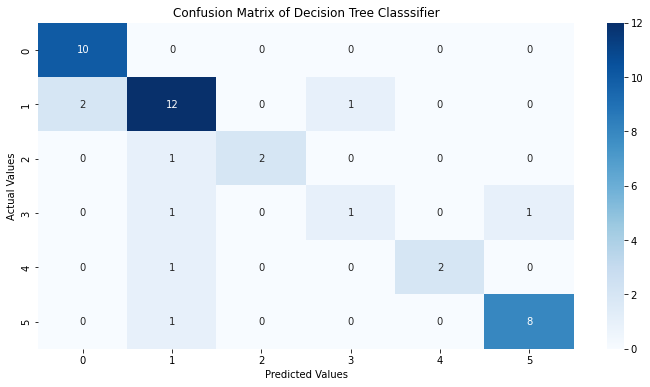

In [ ]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix of Decision Tree Classsifier")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

hyperparameter tuning

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf_param = {"n_estimators":[20,100,300],"max_depth":[3,5,7],"max_features":[2,4,6,8],"min_samples_split":[2,4,6]}

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_cv = GridSearchCV(rf,rf_param,cv=5,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
rf_cv.best_params_

{'max_depth': 7,
 'max_features': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
rf_tuned = RandomForestClassifier(max_depth=7,max_features=4,min_samples_split=2,n_estimators=1000).fit(x_train,y_train)

In [ ]:
y_pred1 = rf_tuned.predict(x_test)

random forest vs hyperparameter tuned random forest

In [ ]:
val = {'Name':['Accuracy','R-Squared','MAE','MSE','RMSE',],
       'RF Classifier':[metrics.accuracy_score(y_test,y_pred),r2_score(y_test,y_pred),mean_absolute_error(y_test,y_pred),mean_squared_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred))],
       'Hyperparameter Tuned RF Classifier':[metrics.accuracy_score(y_test,y_pred1),r2_score(y_test,y_pred1),mean_absolute_error(y_test,y_pred1),mean_squared_error(y_test,y_pred1),np.sqrt(mean_squared_error(y_test,y_pred1))]}

In [ ]:
df2 = pd.DataFrame(val)
df2

,Name,RF Classifier,Hyperparameter Tuned RF Classifier
0,Accuracy,0.813953,0.837209
1,R-Squared,0.735059,0.781423
2,MAE,0.372093,0.302326
3,MSE,0.930233,0.767442
4,RMSE,0.964486,0.876038


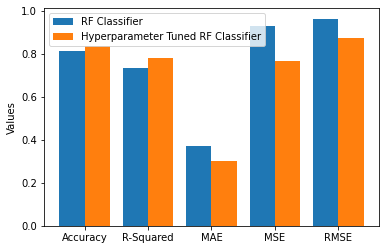

In [ ]:
x = np.arange(len(df2['Name']))
width=0.4
plt.bar(x-width/2,df2["RF Classifier"] , 0.4, label = 'RF Classifier')
plt.bar(x+width/2,df2["Hyperparameter Tuned RF Classifier"], 0.4, label = 'Hyperparameter Tuned RF Classifier')
plt.ylabel('Values')
plt.xticks(x, df2["Name"])
plt.legend()

XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(x_train,y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
y_pred = xgb.predict(x_test)

hypermater tuning with grid search

In [ ]:
xgb_param = {"n_estimators":[50,100,300],"max_depth":[3,5,7],"subsample":[0.5,0.8,1],"learning_rate":[0.1,0.01,0.3]}

In [ ]:
xgb_cv = GridSearchCV(xgb, xgb_param, cv=3, n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


In [ ]:
xgb_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.8}

In [ ]:
xgb_tuned = XGBClassifier(learning_rate=0.1,max_depth=7,n_estimators=10000,subsample=0.8).fit(x_train,y_train)

In [ ]:
y_pred1 = xgb_tuned.predict(x_test)

In [ ]:
val = {'Name':['Accuracy','R-Squared','MAE','MSE','RMSE',],
       'XGBoost':[metrics.accuracy_score(y_test,y_pred),r2_score(y_test,y_pred),mean_absolute_error(y_test,y_pred),mean_squared_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred))],
       'Hyperparameter Tuned XGBoost':[metrics.accuracy_score(y_test,y_pred1),r2_score(y_test,y_pred1),mean_absolute_error(y_test,y_pred1),mean_squared_error(y_test,y_pred1),np.sqrt(mean_squared_error(y_test,y_pred1))]}

In [ ]:
df3 = pd.DataFrame(val)
df3

,Name,XGBoost,Hyperparameter Tuned XGBoost
0,Accuracy,0.813953,0.906977
1,R-Squared,0.827788,0.774800
2,MAE,0.279070,0.232558
3,MSE,0.604651,0.790698
4,RMSE,0.777593,0.889212


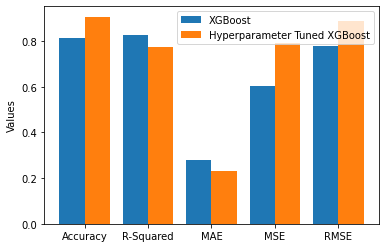

In [ ]:
x = np.arange(len(df3['Name']))
width=0.4
plt.bar(x-width/2,df3["XGBoost"] , 0.4, label = 'XGBoost')
plt.bar(x+width/2,df3["Hyperparameter Tuned XGBoost"], 0.4, label = 'Hyperparameter Tuned XGBoost')
plt.ylabel('Values')
plt.xticks(x, df3["Name"])
plt.legend()